In [1]:
import pandas as pd
import numpy as np
import os

# eye

In [42]:


df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/EyeW_Dataset/Eye_all.csv")

print(" ----------------------- load all the data -------------------")
label_map = [
    #(0,'noise_text'), (1,'noise_image'), (2,'noise_video'), 
    (3,'vertical_down'),(4,'near_far'), (5,'vertical_up'), (6,'far_near'),
    (7,'horizontal_left'),(8,'circle_clock'), (9,'horizontal_right'), 
    (10,'circle_anticlock'), (11,'square_anticlock'), (12,'square_clock'),
]


labelToId = {int(x[0]): i for i, x in enumerate(label_map)}
sub_ids_of_each_sub = {}





#df["activity_id"] = df["activity_id"].astype(str)
df["sub"] = df["sub"].astype(str)


for sub in df["sub"].unique():
    temp_sub = df[df["sub"]==sub]
    sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())

df.reset_index(drop=True,inplace=True)


df = df.set_index('sub_id')
df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

label_mapping = {item[1]:item[0] for item in label_map}

# #df["activity_id"] = df["activity_id"].map(label_mapping)
df["activity_id"] = df["activity_id"].map(labelToId)
df.dropna(inplace=True)
data_y = df.iloc[:,-1]
data_x = df.iloc[:,:-1]

 ----------------------- load all the data -------------------


In [44]:
df["sub"].unique()

array([ 0,  1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2,  3,  4,  5,  6,
        7,  8,  9])

In [34]:
df["activity_id"]

sub_id
0_1       9
0_1       9
0_1       9
0_1       9
0_1       9
         ..
9_1759    4
9_1759    4
9_1759    4
9_1759    4
9_1759    4
Name: activity_id, Length: 459952, dtype: object

In [38]:
labelToId[3]

0

In [8]:
labelToId

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6, 10: 7, 11: 8, 12: 9}

# Mhealth

In [23]:
used_cols = list(np.arange(5,24))
col_names    =  [#"acc_chest_x", "acc_chest_y" , "acc_chest_z",
                 #             "ecg_lead_1" , "ecg_lead_2",
                              "acc_left_ankle_x", "acc_left_ankle_y", "acc_left_ankle_z",
                              "gyro_left_ankle_x", "gyro_left_ankle_y", "gyro_left_ankle_z",
                              "mag_left_ankle_x", "mag_left_ankle_y", "mag_left_ankle_z",
                              "acc_right_lower_arm_x", "acc_right_lower_arm_y", "acc_right_lower_arm_z",
                              "gyro_right_lower_arm_x", "gyro_right_lower_arm_y", "gyro_right_lower_arm_z",
                              "mag_right_lower_arm_x", "right_lower_arm_y", "right_lower_arm_z",
                              "activity_id"]


label_map = [(0, "other"),
                          (1, "Standing still" ),
                          (2, "Sitting and relaxing" ),
                          (3, "Lying down" ),
                          (4, "Walking" ),
                          (5, "Climbing stairs"),
                          (6, "Waist bends forward" ),
                          (7, "Frontal elevation of arms" ),
                          (8, "Knees bending (crouching)" ),
                          (9, "Cycling" ),
                          (10, "Jogging" ),
                          (11, "Running" ),
                          (12, "Jump front & back" )]

drop_activities = [0]

        # TODO find the paper
        # 'mHealth_subject1.log',  'mHealth_subject2.log',  'mHealth_subject3.log',  'mHealth_subject4.log',
        # 'mHealth_subject5.log',  'mHealth_subject6.log',  'mHealth_subject7.log',  'mHealth_subject8.log'
train_keys   = [1,2,3,4,5,6,7,8]
vali_keys    = []
        # 'mHealth_subject9.log',  'mHealth_subject10.log'
test_keys    = [9,10]

#exp_mode     = args.exp_mode
split_tag = "sub"

LOCV_keys = [[1,2],[3,4],[5,6],[7,8],[9,10]]
all_keys = [1,2,3,4,5,6,7,8,9,10]
sub_ids_of_each_sub = {}

file_encoding = {'mHealth_subject1.log':1,
                              'mHealth_subject2.log':2,
                              'mHealth_subject3.log':3,
                              'mHealth_subject4.log':4,
                              'mHealth_subject5.log':5,
                              'mHealth_subject6.log':6,
                              'mHealth_subject7.log':7,
                              'mHealth_subject8.log':8,
                              'mHealth_subject9.log':9,
                              'mHealth_subject10.log':10}


labelToId = {int(x[0]): i for i, x in enumerate(label_map)}
all_labels = list(range(len(label_map)))

drop_activities = [labelToId[i] for i in drop_activities]
no_drop_activites = [item for item in all_labels if item not in drop_activities]





root_path = "/pfs/data5/home/kit/tm/px6680/datasets/Mhealth_Dataset/"
print(" ----------------------- load all the data -------------------")

file_list = os.listdir(root_path)
file_list = [file for file in file_list if "subject" in file] # in total , it should be 10

assert len(file_list) == 10

df_dict = {}

for file in file_list:
    sub_data = pd.read_csv(os.path.join(root_path,file), sep = '\\\t', engine= 'python', header = None)
    
    sub_data =sub_data.iloc[:,used_cols]
    sub_data.columns = col_names

    # TODO check missing labels? 
    sub_data = sub_data.interpolate(method='linear', limit_direction='both')


    sub = file_encoding[file]
    sub_data['sub_id'] = sub
    sub_data["sub"] = sub
    if sub not in sub_ids_of_each_sub.keys():
        sub_ids_of_each_sub[sub] = []
    sub_ids_of_each_sub[sub].append(sub)

    df_dict[sub] = sub_data

# all data

# sub_id, sensor1, sensor2... sensorn, sub, 


 ----------------------- load all the data -------------------


In [26]:
labelToId

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12}

In [27]:
no_drop_activites

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [29]:
df_all = pd.concat(df_dict)
df_all = df_all.set_index('sub_id')
# label transformation
df_all["activity_id"] = df_all["activity_id"].map(labelToId)
# reorder the columns as sensor1, sensor2... sensorn, sub, activity_id
df_all = df_all[col_names[:-1]+["sub"]+["activity_id"]]

data_y = df_all.iloc[:,-1]
data_x = df_all.iloc[:,:-1]

data_x = data_x.reset_index()

In [30]:
data_x

,sub_id,acc_left_ankle_x,acc_left_ankle_y,acc_left_ankle_z,gyro_left_ankle_x,gyro_left_ankle_y,gyro_left_ankle_z,mag_left_ankle_x,mag_left_ankle_y,mag_left_ankle_z,acc_right_lower_arm_x,acc_right_lower_arm_y,acc_right_lower_arm_z,gyro_right_lower_arm_x,gyro_right_lower_arm_y,gyro_right_lower_arm_z,mag_right_lower_arm_x,right_lower_arm_y,right_lower_arm_z,sub
0,1,2.18490,-9.6967,0.63077,0.103900,-0.840530,-0.68762,-0.370000,-0.36327,0.29963,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,1
1,1,2.38760,-9.5080,0.68389,0.085343,-0.838650,-0.68369,-0.197990,-0.18151,0.58298,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,1
2,1,2.40860,-9.5674,0.68113,0.085343,-0.838650,-0.68369,-0.374170,0.18723,0.43851,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,1
3,1,2.18140,-9.4301,0.55031,0.085343,-0.838650,-0.68369,-0.017271,0.18366,0.57571,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,1
4,1,2.41730,-9.3889,0.71098,0.085343,-0.838650,-0.68369,-0.374390,-0.54671,0.44586,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,6,-0.70263,-10.7370,-0.38760,-0.833020,-0.106940,-1.46170,-22.311000,-29.86900,3.63090,-7.7709,-4.1891,5.092600,1.78240,-2.8193,1.814700,14.37000,36.662000,-3.689300,6
1215741,6,0.15446,-10.5470,-0.20287,-0.833020,-0.106940,-1.46170,-23.966000,-26.18200,4.63720,-7.6457,-4.5330,4.700400,1.78240,-2.8193,1.814700,14.36100,35.758000,-3.319500,6
1215742,6,-0.31526,-10.5170,-0.20608,-0.833020,-0.106940,-1.46170,-25.791000,-17.17300,5.30520,-6.8737,-4.3543,3.574000,1.78240,-2.8193,1.814700,14.61000,42.662000,-2.300500,6
1215743,6,0.22728,-10.1550,0.32785,-0.833020,-0.106940,-1.46170,-25.966000,-12.21700,5.11480,-7.7798,-4.3655,3.448400,1.50780,-2.6879,1.984900,16.45800,47.943000,1.293800,6


# MotionSense

In [11]:
print(" ----------------------- load all the data -------------------")

trial_codes = {"dws":[1,2,11], "ups":[3,4,12], "wlk":[7,8,15], "jog":[9,16], "sit":[5,13], "std":[6,14]}    

df_dict = {}
sub_ids_of_each_sub = {}
root_path = "/pfs/data5/home/kit/tm/px6680/datasets/Motion_Sense_Dataset/"
for sub in range(1,25):

    for act in ('dws', 'ups', 'wlk', 'jog', 'sit', 'std'):

        for trial in trial_codes[act]:

            fname = os.path.join(root_path,'data/A_DeviceMotion_data/'+act+'_'+str(trial)+'/sub_'+str(int(sub))+'.csv')
            sub_data = pd.read_csv(fname)
            
            sub_data = sub_data.drop(['Unnamed: 0'], axis=1)

            sub_data["activity_id"] = act

            sub_id = "{}_{}_{}".format(sub,act,trial)
            sub_data["sub_id"] = sub_id
            sub_data["sub"] = sub

            df_dict[sub_id] = sub_data

            # if trial > 10:
            #     self.test_keys.append(sub_id)
            # else:
            #     self.train_keys.append(sub_id)

            if sub not in sub_ids_of_each_sub.keys():
                sub_ids_of_each_sub[sub] = []
            sub_ids_of_each_sub[sub].append(sub_id)

 ----------------------- load all the data -------------------


In [12]:
df_all = pd.concat(df_dict)
df_all = df_all.set_index('sub_id')


label_map = [(0, 'dws'), # downstairs
                  (1, "ups"), # upstairs
                  (2, "sit"), # sitting
                  (3, "std"), # standing
                  (4, "wlk"), # walking
                  (5, "jog"), # jogging
                 ] 

In [14]:
label_mapping = {item[1]:item[0] for item in label_map}

In [16]:
df_all.columns

Index(['attitude.roll', 'attitude.pitch', 'attitude.yaw', 'gravity.x',
       'gravity.y', 'gravity.z', 'rotationRate.x', 'rotationRate.y',
       'rotationRate.z', 'userAcceleration.x', 'userAcceleration.y',
       'userAcceleration.z', 'activity_id', 'sub'],
      dtype='object')

In [ ]:


label_mapping = {item[1]:item[0] for item in label_map}
# because the activity label in the df is not encoded, thet are  'dws', 'ups', 'wlk', 'jog', 'sit', 'std'
# first, map them in to nummeric number
df_all["activity_id"] = df_all["activity_id"].map(label_mapping)
df_all["activity_id"] = df_all["activity_id"].map(self.labelToId)

# reorder the columns as sensor1, sensor2... sensorn, sub, activity_id
df_all = df_all[list(df_all.columns[:-2])+["sub"]+["activity_id"]]

data_y = df_all.iloc[:,-1]
data_x = df_all.iloc[:,:-1]

data_x = data_x.reset_index()
# sub_id, sensor1, sensor2... sensorn, sub, 

# Jubot

In [5]:
df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/Jubot_HAR_Dataset/df_all.csv")
label_map = [
   (0,'drinking'), (1,'walking'), (2,'jumping'), (3,'standing')
]

labelToId = {int(x[0]): i for i, x in enumerate(label_map)}
sub_ids_of_each_sub = {}

# df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/MAG_Breathing_Dataset/MAG_Breathing.csv")
# df = df[col_names]



df["activity_id"] = df["activity_id"].astype(str)
df["sub"] = df["sub"].astype(str)


for sub in df["sub"].unique():
    temp_sub = df[df["sub"]==sub]
    sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())

df.reset_index(drop=True,inplace=True)


df = df.set_index('sub_id')
df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

label_mapping = {item[1]:item[0] for item in label_map}

df["activity_id"] = df["activity_id"].map(label_mapping)
df["activity_id"] = df["activity_id"].map(labelToId)
df.dropna(inplace=True)
data_y = df.iloc[:,-1]
data_x = df.iloc[:,:-1]




# BCI 2 A

In [2]:
df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/BCIIIA_Dataset/bciiia.csv")

In [23]:
df.columns

Index(['col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7', 'col_8',
       'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14', 'col_15',
       'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21', 'col_22',
       'activity_id', 'sub', 'sub_id'],
      dtype='object')

In [20]:
df["sub"].unique()

array(['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09'],
      dtype=object)

In [21]:
df["activity_id"].unique()

array([1, 2, 3, 4])

In [16]:
label_map = [

    (1,'1'),
    (2,'2'), 
    (3,'3'),
    (4,'4'), 

]

labelToId = {int(x[0]): i for i, x in enumerate(label_map)}
sub_ids_of_each_sub = {}

# df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/MAG_Breathing_Dataset/MAG_Breathing.csv")
# df = df[col_names]



df["activity_id"] = df["activity_id"].astype(str)
df["sub"] = df["sub"].astype(str)


for sub in df["sub"].unique():
    temp_sub = df[df["sub"]==sub]
    sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())

df.reset_index(drop=True,inplace=True)
index_list = list(np.arange(0,df.shape[0],2))
df = df.iloc[index_list]


df = df.set_index('sub_id')
df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

label_mapping = {item[1]:item[0] for item in label_map}

df["activity_id"] = df["activity_id"].map(label_mapping)
df["activity_id"] = df["activity_id"].map(labelToId)
df.dropna(inplace=True)
data_y = df.iloc[:,-1]
data_x = df.iloc[:,:-1]

In [ ]:
import pandas as pd
import numpy as np
import os

from I2S0W2C2_CFC.dataloaders.dataloader_base import BASE_DATA

# ========================================       BCIIA_DATA               =============================

class BCIIA_DATA(BASE_DATA):
    
    def __init__(self, args):

        """


        """
        self.used_cols = None

        # ------------------- modify ----------------------
        self.col_names =  []
        
        
        self.pos_filter         = None
        self.sensor_filter      = None
        self.selected_cols      = None

        # 'up', 'waveIn', 'relax', 'waveOut', 'fist', 'open', 'pinch', 'down', 'left', 'right', 'forward', 'backward'
        self.label_map = [
            (1,'1'),
            (2,'2'), 
            (3,'3'),
            (4,'4'), 
                    
        ]

        self.drop_activities = []


        self.train_keys   = []
        self.vali_keys    = []
        self.test_keys    = []
        
        self.LOCV_keys = [
            ['A01'], ['A02'], ['A03'], ['A04'], ['A05'], ['A06'], ['A07'], ['A08', 'A09']
        ]
        self.all_keys = [
            'A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09'
        ]
        
        self.sub_ids_of_each_sub = {}

        self.exp_mode     = args.exp_mode
        self.split_tag    = "sub"
        
        self.file_encoding = {}  # no use 
        

        self.labelToId = {int(x[0]): i for i, x in enumerate(self.label_map)}
        self.all_labels = list(range(len(self.label_map)))

        self.drop_activities = [self.labelToId[i] for i in self.drop_activities]
        self.no_drop_activites = [item for item in self.all_labels if item not in self.drop_activities]
        super(BCIIA_DATA, self).__init__(args)
        
    def load_all_the_data(self, root_path):

        print(" ----------------------- load all the data ----------bciiia---------")

        df = pd.read_csv(os.path.join(root_path,"bciiia.csv"))
        #df = df[self.col_names]

        
        df["activity_id"] = df["activity_id"].astype(str)
        df["sub"] = df["sub"].astype(str)


        for sub in df["sub"].unique():
            temp_sub = df[df["sub"]==sub]
            self.sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())
        
        df.reset_index(drop=True,inplace=True)
        index_list = list(np.arange(0,df.shape[0],2))
        df = df.iloc[index_list]
        
        df = df.set_index('sub_id')



        df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

        label_mapping = {item[1]:item[0] for item in self.label_map}

        df["activity_id"] = df["activity_id"].map(label_mapping)
        df["activity_id"] = df["activity_id"].map(self.labelToId)
        
        df.dropna(inplace=True)
        data_y = df.iloc[:,-1]
        data_x = df.iloc[:,:-1]



        data_x = data_x.reset_index()
        # sub_id, sensor1, sensor2... sensorn, sub, 

        return data_x, data_y

# Imagery

In [3]:
df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/Imagery_Dataset/Imagery.csv")

In [5]:
df["activity_id"].unique()

array([1, 2, 3, 4])

In [6]:
label_map = [

    (1,'1'),
    (2,'2'), 
    (3,'3'), 
    (4,'4'), 

]

labelToId = {int(x[0]): i for i, x in enumerate(label_map)}
sub_ids_of_each_sub = {}

# df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/MAG_Breathing_Dataset/MAG_Breathing.csv")
# df = df[col_names]



df["activity_id"] = df["activity_id"].astype(str)
df["sub"] = df["sub"].astype(str)


for sub in df["sub"].unique():
    temp_sub = df[df["sub"]==sub]
    sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())

index_list = list(np.arange(0,df.shape[0],2))
df = df.iloc[index_list]


df = df.set_index('sub_id')
df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

label_mapping = {item[1]:item[0] for item in label_map}

df["activity_id"] = df["activity_id"].map(label_mapping)
df["activity_id"] = df["activity_id"].map(labelToId)
df.dropna(inplace=True)
data_y = df.iloc[:,-1]
data_x = df.iloc[:,:-1]

In [12]:
for col in df.columns:
    print(col)

col_1
col_2
col_3
col_4
col_5
col_6
col_7
col_8
col_9
col_10
col_11
col_12
col_13
col_14
col_15
col_16
col_17
col_18
col_19
col_20
col_21
col_22
col_23
col_24
col_25
col_26
col_27
col_28
col_29
col_30
col_31
col_32
col_33
col_34
col_35
col_36
col_37
col_38
col_39
col_40
col_41
col_42
col_43
col_44
col_45
col_46
col_47
col_48
col_49
col_50
col_51
col_52
col_53
col_54
col_55
col_56
col_57
col_58
col_59
col_60
col_61
col_62
col_63
col_64
sub
activity_id


In [11]:
df["sub"].unique()

array(['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008',
       'S009', 'S010', 'S011', 'S012', 'S013', 'S014', 'S015', 'S016',
       'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S023', 'S024',
       'S025', 'S026', 'S027', 'S028', 'S029', 'S030', 'S031', 'S032',
       'S033', 'S034', 'S035', 'S036', 'S037', 'S039', 'S040', 'S041',
       'S042', 'S043', 'S044', 'S045', 'S046', 'S047', 'S048', 'S049',
       'S050', 'S051', 'S052', 'S053', 'S054', 'S055', 'S056', 'S057',
       'S058', 'S059', 'S060', 'S061', 'S062', 'S063', 'S064', 'S065',
       'S066', 'S067', 'S068', 'S069', 'S070', 'S071', 'S072', 'S073',
       'S074', 'S075', 'S076', 'S077', 'S078', 'S079', 'S080', 'S081',
       'S083', 'S084', 'S085', 'S086', 'S087', 'S090', 'S091', 'S092',
       'S093', 'S094', 'S095', 'S096', 'S097', 'S098', 'S099', 'S101',
       'S102', 'S103', 'S105', 'S106', 'S107', 'S108', 'S109'],
      dtype=object)

In [7]:
import pandas as pd
import numpy as np
import os

from I2S0W2C2_CFC.dataloaders.dataloader_base import BASE_DATA

# ========================================       Imagery_DATA               =============================

class Imagery_DATA(BASE_DATA):
    
    def __init__(self, args):

        """


        """
        self.used_cols = None

        # ------------------- modify ----------------------
        self.col_names =  []
        
        
        self.pos_filter         = None
        self.sensor_filter      = None
        self.selected_cols      = None

        # 'up', 'waveIn', 'relax', 'waveOut', 'fist', 'open', 'pinch', 'down', 'left', 'right', 'forward', 'backward'
        self.label_map = [
            (1,'1'),
            (2,'2'), 
            (3,'3'), 
            (4,'4'), 
        ]

        self.drop_activities = []


        self.train_keys   = []
        self.vali_keys    = []
        self.test_keys    = []
        
        self.LOCV_keys = [
            ['1BST', '2QWT', '7OYX'],                  
            ['83J1', '9TUL', 'D4GQ'], 
            ['EPE2', 'F9AF', 'FTD7'],
            ['G8B7', 'HAK8', 'NO15'],
            ['P4W9', 'QMQ7', 'W8Z9', 'Y6O3']
        ]
        self.all_keys = [
            ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008','S009', 'S010'],
            ['S011', 'S012', 'S013', 'S014', 'S015', 'S016', 'S017', 'S018', 'S019', 'S020'],
            ['S021', 'S022', 'S023', 'S024', 'S025', 'S026', 'S027', 'S028', 'S029', 'S030'],
            ['S031', 'S032', 'S033', 'S034', 'S035', 'S036', 'S037', 'S039', 'S040', 'S041'],
            ['S042', 'S043', 'S044', 'S045', 'S046', 'S047', 'S048', 'S049', 'S050', 'S051'],
            ['S052', 'S053', 'S054', 'S055', 'S056', 'S057', 'S058', 'S059', 'S060', 'S061'],
            ['S062', 'S063', 'S064', 'S065', 'S066', 'S067', 'S068', 'S069', 'S070', 'S071'],
            ['S072', 'S073', 'S074', 'S075', 'S076', 'S077', 'S078', 'S079', 'S080', 'S081'],
            ['S083', 'S084', 'S085', 'S086', 'S087', 'S090', 'S091', 'S092', 'S093', 'S094', 'S095'],
            ['S096', 'S097', 'S098', 'S099', 'S101', 'S102', 'S103', 'S105', 'S106', 'S107', 'S108', 'S109']
        ]
        
        self.sub_ids_of_each_sub = {}

        self.exp_mode     = args.exp_mode
        self.split_tag    = "sub"
        
        self.file_encoding = {}  # no use 
        

        self.labelToId = {int(x[0]): i for i, x in enumerate(self.label_map)}
        self.all_labels = list(range(len(self.label_map)))

        self.drop_activities = [self.labelToId[i] for i in self.drop_activities]
        self.no_drop_activites = [item for item in self.all_labels if item not in self.drop_activities]
        super(Imagery_DATA, self).__init__(args)
        
    def load_all_the_data(self, root_path):

        print(" ----------------------- load all the data -------------------")

        df = pd.read_csv(os.path.join(root_path,"Imagery.csv"))
        #df = df[self.col_names]

        
        df["activity_id"] = df["activity_id"].astype(str)
        df["sub"] = df["sub"].astype(str)


        for sub in df["sub"].unique():
            temp_sub = df[df["sub"]==sub]
            self.sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())
        
        df.reset_index(drop=True,inplace=True)
        index_list = list(np.arange(0,df_all.shape[0],2))
        df = df.iloc[index_list]
        
        df = df.set_index('sub_id')



        df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

        label_mapping = {item[1]:item[0] for item in self.label_map}

        df["activity_id"] = df["activity_id"].map(label_mapping)
        df["activity_id"] = df["activity_id"].map(self.labelToId)
        
        df.dropna(inplace=True)
        data_y = df.iloc[:,-1]
        data_x = df.iloc[:,:-1]



        data_x = data_x.reset_index()
        # sub_id, sensor1, sensor2... sensorn, sub, 

        return data_x, data_y

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_56,col_57,col_58,col_59,col_60,col_61,col_62,col_63,col_64,sub
sub_id,,,,,,,,,,,,,,,,,,,,,
1,-0.000024,-0.000008,-0.000004,-0.000026,-0.000022,-0.000029,-0.000015,-0.000008,0.000013,0.000012,...,0.000044,0.000039,0.000023,0.000011,-0.000006,0.000026,0.000011,-0.000012,-0.000009,S001
1,-0.000033,-0.000029,-0.000037,-0.000065,-0.000058,-0.000060,-0.000031,-0.000026,-0.000022,-0.000027,...,-0.000012,-0.000014,-0.000029,-0.000027,-0.000025,-0.000016,-0.000018,-0.000032,-0.000005,S001
1,-0.000016,0.000012,0.000016,-0.000012,-0.000003,-0.000014,0.000002,-0.000008,-0.000002,0.000011,...,-0.000024,-0.000023,-0.000023,-0.000006,-0.000002,-0.000049,-0.000040,-0.000025,-0.000022,S001
1,-0.000014,-0.000004,0.000001,-0.000022,-0.000002,-0.000003,0.000015,0.000000,0.000001,0.000010,...,-0.000031,-0.000022,-0.000014,-0.000011,-0.000012,-0.000032,-0.000023,-0.000032,-0.000045,S001
1,-0.000015,0.000014,0.000020,0.000003,0.000009,0.000005,0.000014,-0.000011,0.000008,0.000025,...,-0.000007,-0.000001,-0.000001,-0.000014,-0.000031,-0.000022,-0.000007,-0.000041,-0.000028,S001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17294,0.000013,0.000004,-0.000064,-0.000004,0.000048,0.000014,-0.000001,-0.000049,0.000049,-0.000102,...,-0.000015,-0.000032,0.000001,0.000039,0.000112,-0.000006,-0.000037,0.000038,0.000001,S109
17294,0.000017,-0.000024,-0.000074,-0.000031,0.000009,-0.000029,-0.000032,-0.000057,0.000014,-0.000081,...,-0.000013,-0.000039,-0.000007,0.000024,0.000102,0.000003,-0.000039,0.000040,0.000002,S109
17294,0.000019,-0.000004,-0.000045,-0.000022,0.000018,-0.000021,-0.000009,-0.000044,0.000035,-0.000112,...,0.000020,-0.000005,0.000025,0.000060,0.000134,0.000027,-0.000015,0.000063,0.000025,S109


# MAG Gesture

In [3]:
df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/MAG_Breathing_Dataset/MAG_Breathing.csv")

In [4]:
df

,MAG raw (mV),Airflow raw (ml/s),PZT raw (mV),MAG (mV),Airflow (ml),PZT (mV),sub,sub_id,activity_id
0,1583.935547,187.091918,99.902344,6.905728,-4.651161e+00,-1415.580483,1BST,1,AAL
1,1584.741211,190.354400,96.679688,6.569004,-9.269698e+00,-1428.748574,1BST,1,AAL
2,1583.935547,207.759458,93.457031,6.232028,-1.371418e+01,-1441.435300,1BST,1,AAL
3,1585.546875,214.286140,87.011719,5.894801,-1.809340e+01,-1453.640660,1BST,1,AAL
4,1583.129883,225.162798,80.566406,5.557322,-2.236386e+01,-1465.364653,1BST,1,AAL
...,...,...,...,...,...,...,...,...,...
1485301,1671.752930,-56.378980,1724.121094,5.182919,2.853025e+01,64.894273,Y6O3,239,UAR
1485302,1672.558594,-61.599219,1724.121094,4.828264,2.138986e+01,66.022348,Y6O3,239,UAR
1485303,1674.169922,-53.246870,1724.121094,4.469922,1.433299e+01,67.159298,Y6O3,239,UAR
1485304,1672.558594,-46.982484,1724.121094,4.107893,7.338763e+00,68.305122,Y6O3,239,UAR


In [8]:
col_names = [ 'PZT (mV)' ,'sub', 'sub_id', 'activity_id']




label_map = [
    (0,'AAL'),
    (1,'AAR'),
    (2,'ALL'), 
    (3,'ALR'), 
    (4,'MCH'), 
    (5,'MIXB'),
    (6,'SE'), 
    (7,'SGB'),
    (8,'SNB'),
    (9,'SQT'), 
    (10,'SS'), 
             (11,'STNB'), 
             (12,'TR'), 
             (13,'UAL'), 
             (14,'UAR')
]

labelToId = {int(x[0]): i for i, x in enumerate(label_map)}
sub_ids_of_each_sub = {}

df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/MAG_Breathing_Dataset/MAG_Breathing.csv")
df = df[col_names]



df["activity_id"] = df["activity_id"].astype(str)
df["sub"] = df["sub"].astype(str)


for sub in df["sub"].unique():
    temp_sub = df[df["sub"]==sub]
    sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())

index_list = list(np.arange(0,df.shape[0],2))
df = df.iloc[index_list]


# df = df.set_index('sub_id')
# df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

# label_mapping = {item[1]:item[0] for item in label_map}

# df["activity_id"] = df["activity_id"].map(label_mapping)
# df["activity_id"] = df["activity_id"].map(labelToId)
# df.dropna(inplace=True)
# data_y = df.iloc[:,-1]
# data_x = df.iloc[:,:-1]

In [9]:
df

,PZT (mV),sub,sub_id,activity_id
0,-1415.580483,1BST,1,AAL
2,-1441.435300,1BST,1,AAL
4,-1465.364653,1BST,1,AAL
6,-1487.368543,1BST,1,AAL
8,-1507.446969,1BST,1,AAL
...,...,...,...,...
1485296,59.387013,Y6O3,239,UAR
1485298,61.563294,Y6O3,239,UAR
1485300,63.775072,Y6O3,239,UAR
1485302,66.022348,Y6O3,239,UAR


In [3]:
import pandas as pd
import numpy as np
import os

from I2S0W2C2_CFC.dataloaders.dataloader_base import BASE_DATA

# ========================================       MAG_Breathing_DATA               =============================

class MAG_Breathing_DATA(BASE_DATA):
    
    def __init__(self, args):

        """

        ABSTRACT 
        Electromyography (EMG) has limitations in human machine interface due to disturbances like electrode-shift, fatigue, and subject variability. 
        A potential solution to prevent model degradation is to combine multi-modal data such as EMG and electroencephalography (EEG). 
        This study presents an EMG-EEG dataset for enhancing the development of upper-limb assistive rehabilitation devices. 
        The dataset, acquired from thirty-three volunteers without neuromuscular dysfunction or disease using commercial biosensors is easily replicable and deployable. 
        The dataset consists of seven distinct gestures to maximize performance on the Toronto Rehabilitation Institute hand function test and the Jebsen-Taylor hand function test. 
        The authors aim for this dataset to benefit the research community in creating intelligent and neuro-inspired upper limb assistive rehabilitation devices.
        
        Instructions: 
        The 15 activities executed by the participants were: 
        standing normal breathing (STNB); 
        seated normal breathing (SNB); 
        seated guided-breathing (SGB); 
        normal/deep-alternated breathing (MIXB); 
        march (MCH); 
        squat (SQT); 
        adduction/abduction of the left/right arm (AAL/AAR); 
        adduction/abduction of the left/right leg (ALL/ALR); 
        upwards (overhead) left/right arm extension (UAL/UAR); 
        shoulder elevation (SE); 
        side stretch (SS); 
        and seated trunk rotation (TR).
        """
        self.used_cols = None

        # ------------------- modify ----------------------
        self.col_names =  [ 'PZT (mV)' ,'sub', 'sub_id', 'activity_id']
        
        
        self.pos_filter         = None
        self.sensor_filter      = None
        self.selected_cols      = None

        # 'up', 'waveIn', 'relax', 'waveOut', 'fist', 'open', 'pinch', 'down', 'left', 'right', 'forward', 'backward'
        self.label_map = [
            (0,'AAL'),
            (1,'AAR'),
            (2,'ALL'), 
            (3,'ALR'), 
            (4,'MCH'), 
            (5,'MIXB'),
            (6,'SE'), 
            (7,'SGB'),
            (8,'SNB'),
            (9,'SQT'), 
            (10,'SS'), 
            (11,'STNB'), 
            (12,'TR'), 
            (13,'UAL'), 
            (14,'UAR')
        ]

        self.drop_activities = []


        self.train_keys   = []
        self.vali_keys    = []
        self.test_keys    = []
        
        self.LOCV_keys = [
            ['1BST', '2QWT', '7OYX'],                  
            ['83J1', '9TUL', 'D4GQ'], 
            ['EPE2', 'F9AF', 'FTD7'],
            ['G8B7', 'HAK8', 'NO15'],
            ['P4W9', 'QMQ7', 'W8Z9', 'Y6O3']
        ]
        self.all_keys = ['1BST', '2QWT', '7OYX', 
                         '83J1', '9TUL', 'D4GQ', 
                         'EPE2', 'F9AF', 'FTD7', 
                         'G8B7', 'HAK8', 'NO15', 
                         'P4W9', 'QMQ7', 'W8Z9', 'Y6O3']
        
        self.sub_ids_of_each_sub = {}

        self.exp_mode     = args.exp_mode
        self.split_tag    = "sub"
        
        self.file_encoding = {}  # no use 
        

        self.labelToId = {int(x[0]): i for i, x in enumerate(self.label_map)}
        self.all_labels = list(range(len(self.label_map)))

        self.drop_activities = [self.labelToId[i] for i in self.drop_activities]
        self.no_drop_activites = [item for item in self.all_labels if item not in self.drop_activities]
        super(MAG_Breathing_DATA, self).__init__(args)
        
    def load_all_the_data(self, root_path):

        print(" ----------------------- load all the data -------------------")

        df = pd.read_csv(os.path.join(root_path,"MAG_Breathing.csv"))
        df = df[self.col_names]

        
        df["activity_id"] = df["activity_id"].astype(str)
        df["sub"] = df["sub"].astype(str)


        for sub in df["sub"].unique():
            temp_sub = df[df["sub"]==sub]
            self.sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())
        
        df = df.set_index('sub_id')
        df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

        label_mapping = {item[1]:item[0] for item in self.label_map}

        df["activity_id"] = df["activity_id"].map(label_mapping)
        df["activity_id"] = df["activity_id"].map(self.labelToId)
        
        df.dropna(inplace=True)
        data_y = df.iloc[:,-1]
        data_x = df.iloc[:,:-1]



        data_x = data_x.reset_index()
        # sub_id, sensor1, sensor2... sensorn, sub, 

        return data_x, data_y

,PZT (mV),sub,activity_id
sub_id,,,
1,-1415.580483,1BST,0
1,-1428.748574,1BST,0
1,-1441.435300,1BST,0
1,-1453.640660,1BST,0
1,-1465.364653,1BST,0
...,...,...,...
239,64.894273,Y6O3,14
239,66.022348,Y6O3,14
239,67.159298,Y6O3,14


# EMG Dataset

In [3]:
df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/EMGGesture_Dataset/emg.csv")

In [41]:
df

,0,1,2,3,4,5,6,7,sub,activity_id,sub_id
0,-0.012812,-0.058486,-0.174573,-0.071597,-0.010206,-0.001483,0.000190,-0.003746,1,0,1
1,0.021201,0.103773,0.183810,0.108587,0.010556,0.000552,-0.059163,-0.087778,1,0,1
2,0.126220,0.126205,0.201666,0.084770,-0.191715,-0.056276,-0.042810,0.182203,1,0,1
3,-0.265095,-0.280606,-0.160225,0.099922,0.466668,0.107367,0.212029,0.047668,1,0,1
4,0.223952,-0.114854,-0.256573,-0.140338,-0.070607,-0.012112,-0.107540,-0.131726,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4210035,-0.022079,-0.012396,0.022225,0.012746,-0.007141,0.024243,0.005370,-0.000116,33,6,105251
4210036,-0.009112,-0.007495,0.021713,-0.004262,-0.013824,-0.009703,-0.010256,-0.000191,33,6,105251
4210037,0.004562,-0.009261,-0.005473,0.006402,-0.000198,0.001030,0.017550,0.001910,33,6,105251
4210038,-0.018815,-0.005029,-0.005185,0.002919,0.009159,-0.003463,-0.014677,-0.001059,33,6,105251


In [ ]:
import pandas as pd
import numpy as np
import os

from I2S0W2C2_CFC.dataloaders.dataloader_base import BASE_DATA

# ========================================       EMG_GESTURE_DATA               =============================

class EMG_GESTURE_DATA(BASE_DATA):
    
    def __init__(self, args):

        """

        ABSTRACT 
        Electromyography (EMG) has limitations in human machine interface due to disturbances like electrode-shift, fatigue, and subject variability. 
        A potential solution to prevent model degradation is to combine multi-modal data such as EMG and electroencephalography (EEG). 
        This study presents an EMG-EEG dataset for enhancing the development of upper-limb assistive rehabilitation devices. 
        The dataset, acquired from thirty-three volunteers without neuromuscular dysfunction or disease using commercial biosensors is easily replicable and deployable. 
        The dataset consists of seven distinct gestures to maximize performance on the Toronto Rehabilitation Institute hand function test and the Jebsen-Taylor hand function test. 
        The authors aim for this dataset to benefit the research community in creating intelligent and neuro-inspired upper limb assistive rehabilitation devices.
        
        Instructions: 
        The acquisition of the electromyography data (EMG) was performed using the defunct Myo armband, consisting of 8-channels with a 200 Hz sampling frequency. 
        The EMG data, acquired from the upper-limb at maximum voluntary contraction, remains raw and unfiltered. In addition, electroencephalography (EEG) data was collected through the use of openBCI Ultracortex IV, 
        composed of 8-channels with a 250 Hz sampling frequency. The dataset is accessible both in .CSV and .MAT formats, with individual subject data in a singular directory. 
        A supervised machine learning approach can be undertaken while utilizing the naming nomenclature of the files. The file name designates the subject as S{}, repetition as R{}, and gesture as G{} respectively.
        The dataset consists of six repetitions per gesture and seven gestures in total. The gesture numbering scheme is as follows: 
        G1 represents a large diameter grasp, 
        G2 a medium diameter grasp, 
        G3 a three-finger sphere grasp, 
        G4 a prismatic pinch grasp, 
        G5 a power grasp, 
        G6 a cut grasp, 
        and G7 an open hand. 
        Detailed description of the dataset including starter code can be found here: https://github.com/HumanMachineInterface/Gest-Infer
        """
        self.used_cols = None
        
        self.col_names =  [ 
            'col_1', 'col_2', 'col_3', 'col_4',
            'col_5', 'col_6', 'col_7', 'col_8',
            'sub', 'activity_id', 'sub_id'
        ]
        
        
        self.pos_filter         = None
        self.sensor_filter      = None
        self.selected_cols      = None

        # 'up', 'waveIn', 'relax', 'waveOut', 'fist', 'open', 'pinch', 'down', 'left', 'right', 'forward', 'backward'
        self.label_map = [
            (0,"0"), (1,"1"), (2,"2"), (3,"3"), (4,"4"), (5,"5"), 
            (6,"6")
        ]

        self.drop_activities = []


        self.train_keys   = []
        self.vali_keys    = []
        self.test_keys    = []
        
        self.LOCV_keys = [
            ['1', '2', '3', '4', '5'], 
            ['6', '7', '8', '9', '10'], 
            ['11', '12', '13', '14', '15'], 
            ['16', '17', '18', '19', '20'], 
            ['21', '22', '23', '24', '25'],
            ['26', '27', '28', '29', '30'],
            ['31', '32', '33']
        ]
        self.all_keys = ['1', '2', '3', '4', '5', 
                         '6', '7', '8', '9', '10', 
                         '11', '12', '13', '14', '15', 
                         '16', '17', '18', '19', '20', 
                         '21', '22', '23', '24', '25', 
                         '26', '27', '28', '29', '30', 
                         '31', '32', '33']
        
        self.sub_ids_of_each_sub = {}

        self.exp_mode     = args.exp_mode
        self.split_tag    = "sub"
        
        self.file_encoding = {}  # no use 
        

        self.labelToId = {int(x[0]): i for i, x in enumerate(self.label_map)}
        self.all_labels = list(range(len(self.label_map)))

        self.drop_activities = [self.labelToId[i] for i in self.drop_activities]
        self.no_drop_activites = [item for item in self.all_labels if item not in self.drop_activities]
        print("self.no_drop_activites :", self.no_drop_activites)
        super(EMG_GESTURE_DATA, self).__init__(args)
        
    def load_all_the_data(self, root_path):

        print(" ----------------------- load all the data -------------------")

        df = pd.read_csv(os.path.join(root_path,"eeg.csv"))
        df.columns = self.col_names

        
        df["activity_id"] = df["activity_id"].astype(str)
        df["sub"] = df["sub"].astype(str)


        for sub in df["sub"].unique():
            temp_sub = df[df["sub"]==sub]
            self.sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())
        
        df = df.set_index('sub_id')
        df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]


        label_mapping = {item[1]:item[0] for item in self.label_map}

        df["activity_id"] = df["activity_id"].map(label_mapping)
        df["activity_id"] = df["activity_id"].map(self.labelToId)
        print(" unique df[activity_id] :", df["activity_id"].unique())
        df.dropna(inplace=True)
        data_y = df.iloc[:,-1]
        data_x = df.iloc[:,:-1]



        data_x = data_x.reset_index()

        # sub_id, sensor1, sensor2... sensorn, sub, 

        return data_x, data_y

# EEGGesture

In [2]:
df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/EEGGesture_Dataset/eeg.csv")

In [38]:
col_names = [ 
            'col_1', 'col_2', 'col_3', 'col_4',
            'col_5', 'col_6', 'col_7', 'col_8',
            'sub', 'activity_id', 'sub_id']




label_map = [
    (0,"0"), (1,"1"), (2,"2"), (3,"3"), (4,"4"), (5,"5"), 
            (6,"6"), (7,"7")
]

labelToId = {int(x[0]): i for i, x in enumerate(label_map)}
sub_ids_of_each_sub = {}

df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/EEGGesture_Dataset/eeg.csv")
df.columns = col_names



df["activity_id"] = df["activity_id"].astype(str)
df["sub"] = df["sub"].astype(str)


for sub in df["sub"].unique():
    temp_sub = df[df["sub"]==sub]
    sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())

df = df.set_index('sub_id')
df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

label_mapping = {item[1]:item[0] for item in label_map}

df["activity_id"] = df["activity_id"].map(label_mapping)
df["activity_id"] = df["activity_id"].map(labelToId)
# df.dropna(inplace=True)
# data_y = df.iloc[:,-1]
# data_x = df.iloc[:,:-1]

In [39]:
df

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,sub,activity_id
sub_id,,,,,,,,,,
1,1.136737,1.099937,0.942897,0.534276,-0.171450,-0.973894,-1.437537,-1.130966,1,0
1,1.140757,1.102834,0.942762,0.529827,-0.178577,-0.979182,-1.436475,-1.121947,1,0
1,1.144507,1.105530,0.942616,0.525635,-0.185274,-0.984137,-1.435448,-1.113430,1,0
1,1.140821,1.102880,0.942760,0.529756,-0.178689,-0.979260,-1.436454,-1.121813,1,0
1,1.136629,1.099865,0.942911,0.534394,-0.171290,-0.973800,-1.437576,-1.131133,1,0
...,...,...,...,...,...,...,...,...,...,...
86559,-1.099910,-0.999255,-0.816381,-0.584920,-0.112300,0.849897,1.721596,1.041272,33,6
86559,0.816929,0.727838,0.683445,0.794517,0.602044,-0.571348,-1.947382,-1.106043,33,6
86559,1.017687,0.928000,0.797312,0.659683,0.226273,-0.842855,-1.834334,-0.951765,33,6


In [27]:
df["sub"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33'],
      dtype=object)

In [ ]:
import pandas as pd
import numpy as np
import os

from I2S0W2C2_CFC.dataloaders.dataloader_base import BASE_DATA

# ========================================       EEG_GESTURE_DATA               =============================

class EEG_GESTURE_DATA(BASE_DATA):
    
    def __init__(self, args):

        """

        ABSTRACT 
        Electromyography (EMG) has limitations in human machine interface due to disturbances like electrode-shift, fatigue, and subject variability. 
        A potential solution to prevent model degradation is to combine multi-modal data such as EMG and electroencephalography (EEG). 
        This study presents an EMG-EEG dataset for enhancing the development of upper-limb assistive rehabilitation devices. 
        The dataset, acquired from thirty-three volunteers without neuromuscular dysfunction or disease using commercial biosensors is easily replicable and deployable. 
        The dataset consists of seven distinct gestures to maximize performance on the Toronto Rehabilitation Institute hand function test and the Jebsen-Taylor hand function test. 
        The authors aim for this dataset to benefit the research community in creating intelligent and neuro-inspired upper limb assistive rehabilitation devices.
        
        Instructions: 
        The acquisition of the electromyography data (EMG) was performed using the defunct Myo armband, consisting of 8-channels with a 200 Hz sampling frequency. 
        The EMG data, acquired from the upper-limb at maximum voluntary contraction, remains raw and unfiltered. In addition, electroencephalography (EEG) data was collected through the use of openBCI Ultracortex IV, 
        composed of 8-channels with a 250 Hz sampling frequency. The dataset is accessible both in .CSV and .MAT formats, with individual subject data in a singular directory. 
        A supervised machine learning approach can be undertaken while utilizing the naming nomenclature of the files. The file name designates the subject as S{}, repetition as R{}, and gesture as G{} respectively.
        The dataset consists of six repetitions per gesture and seven gestures in total. The gesture numbering scheme is as follows: 
        G1 represents a large diameter grasp, 
        G2 a medium diameter grasp, 
        G3 a three-finger sphere grasp, 
        G4 a prismatic pinch grasp, 
        G5 a power grasp, 
        G6 a cut grasp, 
        and G7 an open hand. 
        Detailed description of the dataset including starter code can be found here: https://github.com/HumanMachineInterface/Gest-Infer
        """
        self.used_cols = None
        
        self.col_names =  [ 
            'col_1', 'col_2', 'col_3', 'col_4',
            'col_5', 'col_6', 'col_7', 'col_8',
            'sub', 'activity_id', 'sub_id'
        ]
        
        
        self.pos_filter         = None
        self.sensor_filter      = None
        self.selected_cols      = None

        # 'up', 'waveIn', 'relax', 'waveOut', 'fist', 'open', 'pinch', 'down', 'left', 'right', 'forward', 'backward'
        self.label_map = [
            (0,"0"), (1,"1"), (2,"2"), (3,"3"), (4,"4"), (5,"5"), 
            (6,"6"), (7,"7")
        ]

        self.drop_activities = []


        self.train_keys   = []
        self.vali_keys    = []
        self.test_keys    = []
        
        self.LOCV_keys = [
            ['1', '2', '3', '4', '5'], 
            ['6', '7', '8', '9', '10'], 
            ['11', '12', '13', '14', '15'], 
            ['16', '17', '18', '19', '20'], 
            ['21', '22', '23', '24', '25'],
            ['26', '27', '28', '29', '30'],
            ['31', '32', '33']
        ]
        self.all_keys = ['1', '2', '3', '4', '5', 
                         '6', '7', '8', '9', '10', 
                         '11', '12', '13', '14', '15', 
                         '16', '17', '18', '19', '20', 
                         '21', '22', '23', '24', '25', 
                         '26', '27', '28', '29', '30', 
                         '31', '32', '33']
        
        self.sub_ids_of_each_sub = {}

        self.exp_mode     = args.exp_mode
        self.split_tag    = "sub"
        
        self.file_encoding = {}  # no use 
        

        self.labelToId = {int(x[0]): i for i, x in enumerate(self.label_map)}
        self.all_labels = list(range(len(self.label_map)))

        self.drop_activities = [self.labelToId[i] for i in self.drop_activities]
        self.no_drop_activites = [item for item in self.all_labels if item not in self.drop_activities]
        super(EEG_GESTURE_DATA, self).__init__(args)
        
    def load_all_the_data(self, root_path):

        print(" ----------------------- load all the data -------------------")

        df = pd.read_csv(os.path.join(root_path,"eeg.csv"))
        df.columns = self.col_names

        
        df["activity_id"] = df["activity_id"].astype(str)
        df["sub"] = df["sub"].astype(str)


        for sub in df["sub"].unique():
            temp_sub = df[df["sub"]==sub]
            self.sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())
        
        df = df.set_index('sub_id')
        df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]


        df["activity_id"] = df["activity_id"].map(self.labelToId)
        
        df.dropna(inplace=True)
        data_y = df.iloc[:,-1]
        data_x = df.iloc[:,:-1]



        data_x = data_x.reset_index()
        # sub_id, sensor1, sensor2... sensorn, sub, 

        return data_x, data_y

# GesHome

In [2]:
df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/GesHome_dataset/geshome.csv")

<Axes: >

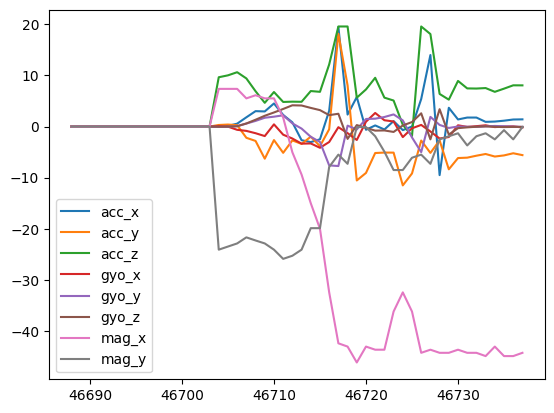

In [11]:
df[df["sub_id"]==900].iloc[:,:8].plot()

In [60]:
 
col_names = [ 
            'acc_x', 'acc_y', 'acc_z', 
            'gyo_x', 'gyo_y', 'gyo_z', 
            'mag_x', 'mag_y', 'mag_z', 
            'sub', 'sub_id', 'activity_id']

label_map = [(0,'Move_up;'), (1,'Move_left;'), (2,'Move_down;'), (3,'Move_right;'), (4,'Select;'),
                          (5,'Clap;'), (6,'CWCircle;'),(7, 'CCWCircle;'),
                          (8,'0;'), (9,'1;'), (10,'2;'), (11,'3;'), (12,'4;'), (13,'5;'),
                          (14,'6;'), (15,'7;'), (16,'8;'), (17,'9;')]

labelToId = {int(x[0]): i for i, x in enumerate(label_map)}
sub_ids_of_each_sub = {}

df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/GesHome_dataset/geshome.csv")
df = df[col_names]


df["activity_id"] = df["activity_id"].astype(str)
df["sub"] = df["sub"].astype(str)


for sub in df["sub"].unique():
    temp_sub = df[df["sub"]==sub]
    sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())

df = df.set_index('sub_id')
df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

label_mapping = {item[1]:item[0] for item in label_map}

df["activity_id"] = df["activity_id"].map(label_mapping)
df["activity_id"] = df["activity_id"].map(labelToId)
df.dropna(inplace=True)
data_y = df.iloc[:,-1]
data_x = df.iloc[:,:-1]

In [65]:
data_x = data_x.reset_index()
for subid in data_x["sub_id"].unique():
    temp = data_x[data_x["sub_id"]==subid]
    assert temp.shape[0]>=50

In [51]:
import pandas as pd
import numpy as np
import os

from I2S0W2C2_CFC.dataloaders.dataloader_base import BASE_DATA

# ========================================       GESHOME_GESTURE_DATA               =============================

class GESHOME_GESTURE_DATA(BASE_DATA):
    
    def __init__(self, args):

        """

        ABSTRACT 
        GesHome dataset consists of 18 hand gestures from 20 non-professional subjects with various ages and occupation. 
        The participant performed 50 times for each gesture in 5 days. 
        Thus, GesHome consists of 18000 gesture samples in total. 
        Using embedded accelerometer and gyroscope, we take 3-axial linear acceleration and 3-axial angular velocity with frequency equals to 25Hz. 
        The experiments have been video-recorded to label the data manually using ELan tool.
        
        The collected files include columns in the order of 
        {datetime, accelerometer x, accelerometer y, accelerometer z, gyroscope x, gyroscope y, gyroscope z, magnetometer x, magnetometer y, magnetometer z, activity label}, 
        atetime column is set as format "yyyy-MM-dd;HH:mm:ss.SSS", while the label column format is string.
        
        Instructions: 
        GesHome dataset consists of 18 hand gestures from 20 non-professional subjects with various ages and occupation. 
        The participant performed 50 times for each gesture in 5 days. Thus, GesHome consists of 18000 gesture samples in total. 
        Using embedded accelerometer and gyroscope, we take 3-axial linear acceleration and 3-axial angular velocity with frequency equals to 25Hz. 
        The experiments have been video-recorded to label the data manually using ELan tool.
        
        The collected files include columns in the order of 
        {datetime, accelerometer x, accelerometer y, accelerometer z, gyroscope x, gyroscope y, gyroscope z, magnetometer x, magnetometer y, magnetometer z, activity label}, 
        datetime column is set as format "yyyy-MM-dd;HH:mm:ss.SSS", while the label column format is string.
        """
        self.used_cols = None
        
        self.col_names = [ 
            'acc_x', 'acc_y', 'acc_z', 
            'gyo_x', 'gyo_y', 'gyo_z', 
            'mag_x', 'mag_y', 'mag_z', 
            'sub', 'sub_id', 'activity_id']
        
        
        self.pos_filter         = None
        self.sensor_filter      = None
        self.selected_cols      = None

        # 'up', 'waveIn', 'relax', 'waveOut', 'fist', 'open', 'pinch', 'down', 'left', 'right', 'forward', 'backward'
        self.label_map = [(0,'Move_up;'), (1,'Move_left;'), (2,'Move_down;'), (3,'Move_right;'), (4,'Select;'),
                          (5,'Clap;'), (6,'CWCircle;'),(7, 'CCWCircle;'),
                          (8,'0;'), (9,'1;'), (10,'2;'), (11,'3;'), (12,'4;'), (13,'5;'),
                          (14,'6;'), (15,'7;'), (16,'8;'), (17,'9;')]
        self.drop_activities = []


        self.train_keys   = []
        self.vali_keys    = []
        self.test_keys    = []
        
        self.LOCV_keys = [
            ["('wd', 1)", "('jp', 2)", "('mp', 3)"],
            ["('ku', 4)", "('dd', 5)", "('sw', 6)"],
            ["('zp', 7)", "('ku', 8)", "('pp', 9)"],
            ["('mo', 10)", "('sk', 11)", "('mu', 12)"],
            ["('mk', 13)", "('mo', 14)", "('tt', 15)"],
            ["('mp', 16)", "('jP', 17)"]
        ]
        self.all_keys = ['S1','S2', 'S3', 'S4', 
                         'S5', 'S6', 'S7', 'S8', 
                         'S9','S10', 'S11', 'S12',
                         'S13', 'S14', 'S15', 'S16', 
                         'S17', 'S18', 'S19', 'S20']
        
        self.sub_ids_of_each_sub = {}

        self.exp_mode     = args.exp_mode
        self.split_tag    = "sub"
        
        self.file_encoding = {}  # no use 
        

        self.labelToId = {int(x[0]): i for i, x in enumerate(self.label_map)}
        self.all_labels = list(range(len(self.label_map)))

        self.drop_activities = [self.labelToId[i] for i in self.drop_activities]
        self.no_drop_activites = [item for item in self.all_labels if item not in self.drop_activities]
        super(GESHOME_GESTURE_DATA, self).__init__(args)
        
    def load_all_the_data(self, root_path):

        print(" ----------------------- load all the data -------------------")


        df = pd.read_csv(os.path.join(root_path,"geshome.csv"))
        df = df[self.col_names]


        df["activity_id"] = df["activity_id"].astype(str)
        df["sub"] = df["sub"].astype(str)


        for sub in df["sub"].unique():
            temp_sub = df[df["sub"]==sub]
            self.sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())
        
        df = df.set_index('sub_id')
        df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

        label_mapping = {item[1]:item[0] for item in self.label_map}

        df["activity_id"] = df["activity_id"].map(label_mapping)
        df["activity_id"] = df["activity_id"].map(self.labelToId)
        
        df.dropna(inplace=True)
        data_y = df.iloc[:,-1]
        data_x = df.iloc[:,:-1]



        data_x = data_x.reset_index()
        # sub_id, sensor1, sensor2... sensorn, sub, 

        return data_x, data_y

,acc_x,acc_y,acc_z,gyo_x,gyo_y,gyo_z,mag_x,mag_y,mag_z,sub,sub_id,activity_id
0,-9.148493,0.023936,0.789901,-0.087891,-0.106535,-0.085228,-38.369000,8.967000,11.986500,S1,1,Move_up;
1,-9.119769,0.186704,0.837774,0.085228,-0.098545,0.005327,-35.959500,9.577000,12.566000,S1,1,Move_up;
2,-9.320834,0.320748,0.856923,0.069248,-0.071911,0.087891,-37.149002,10.766500,11.986500,S1,1,Move_up;
3,-9.186790,0.406919,1.038840,0.055931,-0.066584,0.082565,-37.149002,8.967000,10.766500,S1,1,Move_up;
4,-9.071896,0.406919,1.115436,0.002663,-0.023970,0.066584,-37.149002,9.577000,13.786000,S1,1,Move_up;
...,...,...,...,...,...,...,...,...,...,...,...,...
964033,1.287778,-4.073976,8.286782,0.130505,0.111862,0.045277,25.376000,-9.638001,-29.463001,S9,18036,Clap;
964034,1.019691,-4.284616,8.258059,0.103872,0.045277,0.018644,25.376000,-10.827500,-32.421500,S9,18036,Clap;
964035,1.000542,-4.160147,8.506997,0.154476,0.031960,-0.010653,24.979500,-9.638001,-30.957500,S9,18036,Clap;
964036,0.990967,-4.322914,8.526146,0.069248,0.039951,-0.031960,24.552500,-10.827500,-27.968500,S9,18036,Clap;


# language

In [72]:
data = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/Language_Gesture_Dataset/new_df.csv")
# missing values
# 17 sub
# 36 classes
# data["sub_id"].nunique() == 75 fixed window

In [78]:
data.columns

Index(['sub', 'P1_1', 'P1_2', 'P2_1', 'P2_2', 'P3_1', 'P3_2', 'P4_1', 'P4_2',
       'P5_1', 'P5_2', 'Euler_x', 'Euler_y', 'Euler_z', 'Acc_x', 'Acc_y',
       'Acc_z', 'activity_id', 'sub_id'],
      dtype='object')

In [77]:
data["sub_id"].nunique()

5533

In [18]:
col_names = [ 
            'P1_1', 'P1_2', 
            'P2_1', 'P2_2', 
            'P3_1', 'P3_2', 
            'P4_1', 'P4_2',
            'P5_1', 'P5_2', 
            'Euler_x', 'Euler_y', 'Euler_z', 
            'Acc_x', 'Acc_y', 'Acc_z', 
            'sub',
            'activity_id', 
            'sub_id']
label_map = [
            (0,'a '), (1,'b '), (2,'c '), (3,'e '), (4,'i '), (5,'l '), (6,'m '), (7,'n '), (8,'o '), (9,'p '), (10,'r '), 
            (11,'s '), (12,'t '), (13,'u '), (14,'w '), (15,'y '), (16,'Ä… '), (17,'Ä‡ '), (18,'ch'), (19,'cz'), (20,'d '), 
            (21,'Ä™ '), (22,'f '), (23,'h '), (24,'j '), (25,'k '), (26,'Ĺ‚ '), (27,'Ĺ„ '), (28,'Ăł '), (29,'rz'), (30,'Ĺ› '),
            (31,'sz'), (32,'z '), (33,'Ĺş '), (34,'ĹĽ '), (35,'g ')]
labelToId = {int(x[0]): i for i, x in enumerate(label_map)}
print(" ----------------------- load all the data -------------------")
df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/Language_Gesture_Dataset/new_df.csv")
df = df[col_names]
df = df.interpolate(method='polynomial', order=2)
sub_ids_of_each_sub = {}
df["activity_id"] = df["activity_id"].astype(str)
df["sub"] = df["sub"].astype(str)


for sub in df["sub"].unique():
    temp_sub = df[df["sub"]==sub]
    sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())

df = df.set_index('sub_id')
df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

label_mapping = {item[1]:item[0] for item in label_map}

df["activity_id"] = df["activity_id"].map(label_mapping)
df["activity_id"] = df["activity_id"].map(labelToId)
df.dropna(inplace=True)
data_y = df.iloc[:,-1]
data_x = df.iloc[:,:-1]


data_x = data_x.reset_index()


 ----------------------- load all the data -------------------


In [19]:
for subid in data_x["sub_id"].unique():
    temp = data_x[data_x["sub_id"]==subid]
    if temp.shape[0]!=75:
        print(subid)

In [22]:
data_x.shape[0]/data_x["sub_id"].nunique()

75.0

In [ ]:
import pandas as pd
import numpy as np
import os

from I2S0W2C2_CFC.dataloaders.dataloader_base import BASE_DATA

# ========================================       LANGUAGE_GESTURE_DATA               =============================

class LANGUAGE_GESTURE_DATA(BASE_DATA):
    
    def __init__(self, args):

        """

        ABSTRACT 
        The dataset contains data obtained by measuring hand movements while performing the letters of the Polish Sign Language alphabet. 
        It contains data from 16 users performing all 36 letters ten times. 
        Each single execution of a gesture is recorded in 75 samples. 
        The experiment also included data augmentation, multiplying the number of data by 200. times.

        Instructions: 
        Each single gesture execution is recorded in 75 samples. 
        The data are stored in the columns 
        exam_id, P1_1, P1_2, P2_1, P2_2, P3_1, P3_2, P4_1, P4_2, P5_1, P5_2, Euler_x, Euler_y, Euler_z, Acc_x, Acc_y, Acc_z, sign, timestamp 
        denoting in turn: subject id, finger piezoresistive sensor readings prefixed with P, gyro sensor prefixed with Euler, accelerometric sensor prefixed with Acc, 
        sign performed, timestamp of each sample.
        """
        self.used_cols = None
        
        self.col_names = [ 
            'P1_1', 'P1_2', 
            'P2_1', 'P2_2', 
            'P3_1', 'P3_2', 
            'P4_1', 'P4_2',
            'P5_1', 'P5_2', 
            'Euler_x', 'Euler_y', 'Euler_z', 
            'Acc_x', 'Acc_y', 'Acc_z', 
            'sub'
            'activity_id', 
            'sub_id']
        
        
        self.pos_filter         = None
        self.sensor_filter      = None
        self.selected_cols      = None

        # 'up', 'waveIn', 'relax', 'waveOut', 'fist', 'open', 'pinch', 'down', 'left', 'right', 'forward', 'backward'
        self.label_map = [
            (0,'a '), (1,'b '), (2,'c '), (3,'e '), (4,'i '), (5,'l '), (6,'m '), (7,'n '), (8,'o '), (9,'p '), (10,'r '), 
            (11,'s '), (12,'t '), (13,'u '), (14,'w '), (15,'y '), (16,'Ä… '), (17,'Ä‡ '), (18,'ch'), (19,'cz'), (20,'d '), 
            (21,'Ä™ '), (22,'f '), (23,'h '), (24,'j '), (25,'k '), (26,'Ĺ‚ '), (27,'Ĺ„ '), (28,'Ăł '), (29,'rz'), (30,'Ĺ› '),
            (31,'sz'), (32,'z '), (33,'Ĺş '), (34,'ĹĽ '), (35,'g ')]
        self.drop_activities = []


        self.train_keys   = []
        self.vali_keys    = []
        self.test_keys    = []
        
        self.LOCV_keys = [
            ["('wd', 1)", "('jp', 2)", "('mp', 3)"],
            ["('ku', 4)", "('dd', 5)", "('sw', 6)"],
            ["('zp', 7)", "('ku', 8)", "('pp', 9)"],
            ["('mo', 10)", "('sk', 11)", "('mu', 12)"],
            ["('mk', 13)", "('mo', 14)", "('tt', 15)"],
            ["('mp', 16)", "('jP', 17)"]
        ]
        self.all_keys = ["('wd', 1)",
                         "('jp', 2)",
                         "('mp', 3)",
                         "('ku', 4)",
                         "('dd', 5)",
                         "('sw', 6)",
                         "('zp', 7)",
                         "('ku', 8)",
                         "('pp', 9)",
                         "('mo', 10)",
                         "('sk', 11)",
                         "('mu', 12)",
                         "('mk', 13)",
                         "('mo', 14)", 
                         "('tt', 15)",
                         "('mp', 16)",
                         "('jP', 17)"]
        
        self.sub_ids_of_each_sub = {}

        self.exp_mode     = args.exp_mode
        self.split_tag    = "sub"
        
        self.file_encoding = {}  # no use 
        

        self.labelToId = {int(x[0]): i for i, x in enumerate(self.label_map)}
        self.all_labels = list(range(len(self.label_map)))

        self.drop_activities = [self.labelToId[i] for i in self.drop_activities]
        self.no_drop_activites = [item for item in self.all_labels if item not in self.drop_activities]
        super(LANGUAGE_GESTURE_DATA, self).__init__(args)
        
    def load_all_the_data(self, root_path):

        print(" ----------------------- load all the data -------------------")



        df = pd.read_csv(os.path.join(root_path,"new_df.csv"))
        df = df[self.col_names]
        df = df.interpolate(method='polynomial', order=2)

        df["activity_id"] = df["activity_id"].astype(str)
        df["sub"] = df["sub"].astype(str)
        
        
        for sub in df["sub"].unique():
            temp_sub = df[df["sub"]==sub]
            self.sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())
        
        df = df.set_index('sub_id')
        df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]
        
        label_mapping = {item[1]:item[0] for item in self.label_map}
        
        df["activity_id"] = df["activity_id"].map(label_mapping)
        df["activity_id"] = df["activity_id"].map(self.labelToId)
        df.dropna(inplace=True)
        data_y = df.iloc[:,-1]
        data_x = df.iloc[:,:-1]



        data_x = data_x.reset_index()
        # sub_id, sensor1, sensor2... sensorn, sub, 

        return data_x, data_y

# Sensed

In [2]:
data = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/Sensed_Dataset/sensed.csv")
# 25 subs
# 26 class
# 150 window fixed

/scratch/slurm_tmpdir/job_22994203/ipykernel_38593/641409961.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

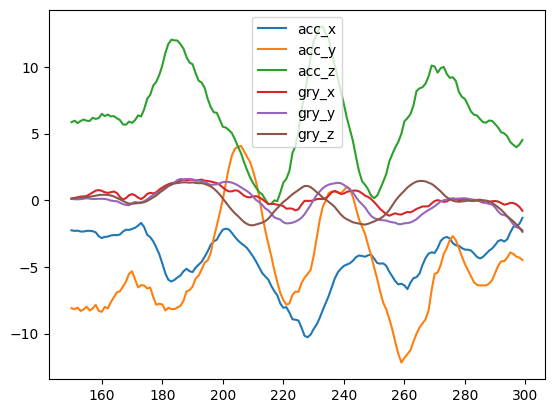

<Figure size 640x480 with 0 Axes>

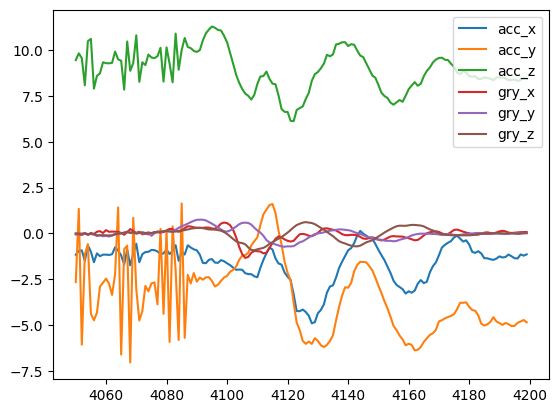

<Figure size 640x480 with 0 Axes>

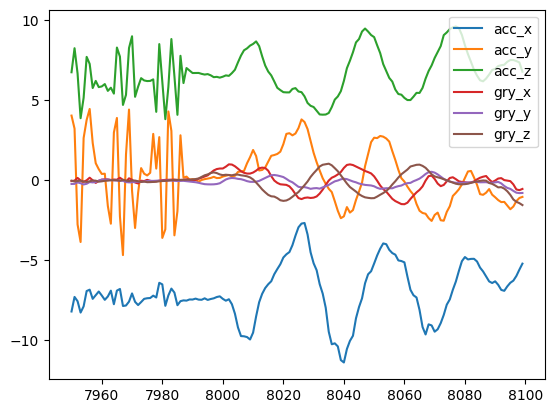

<Figure size 640x480 with 0 Axes>

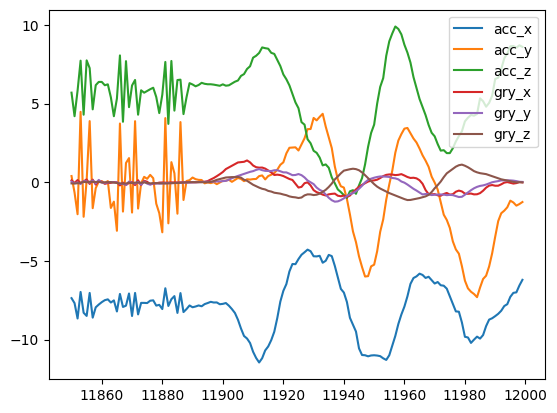

<Figure size 640x480 with 0 Axes>

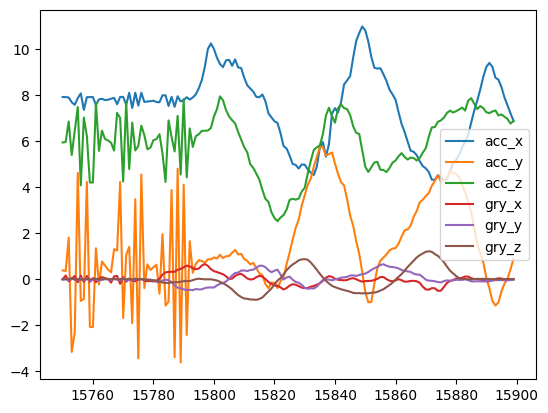

<Figure size 640x480 with 0 Axes>

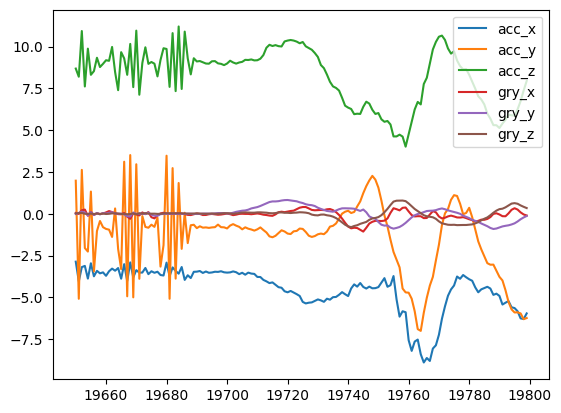

<Figure size 640x480 with 0 Axes>

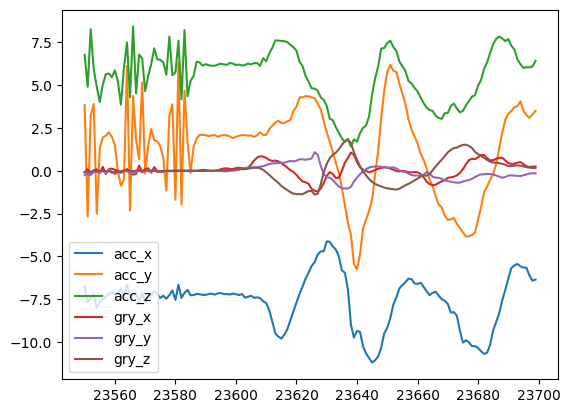

<Figure size 640x480 with 0 Axes>

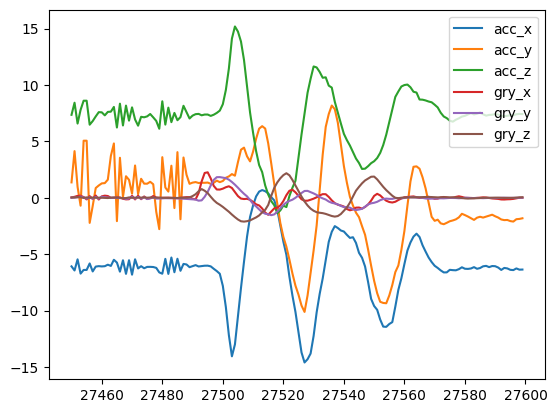

<Figure size 640x480 with 0 Axes>

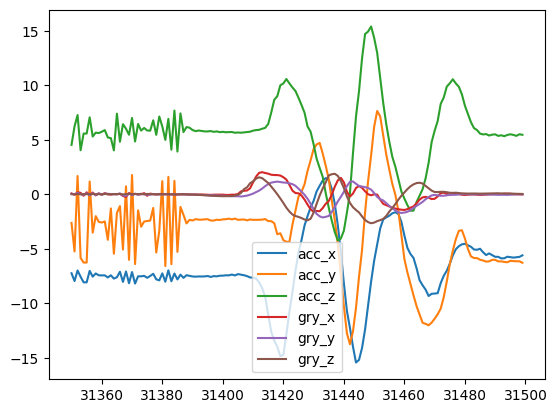

<Figure size 640x480 with 0 Axes>

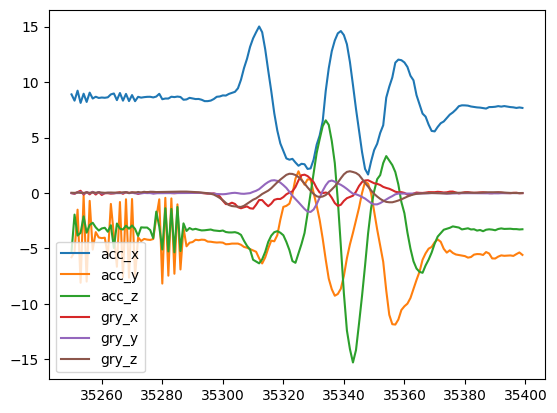

<Figure size 640x480 with 0 Axes>

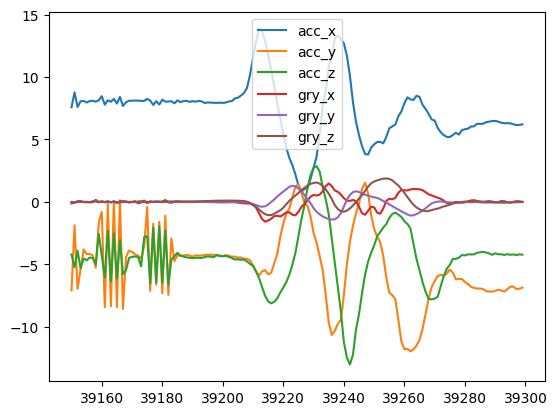

<Figure size 640x480 with 0 Axes>

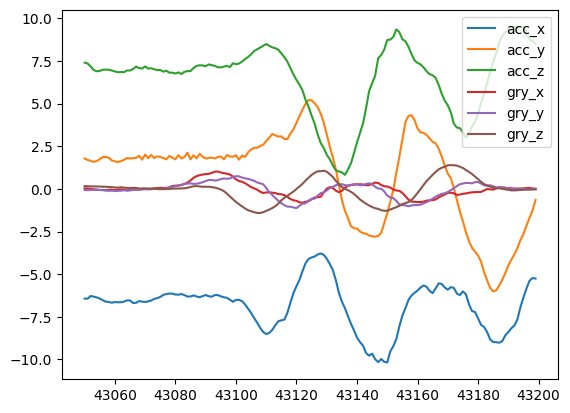

<Figure size 640x480 with 0 Axes>

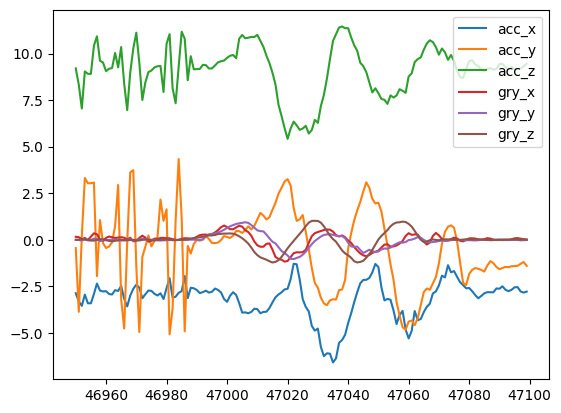

<Figure size 640x480 with 0 Axes>

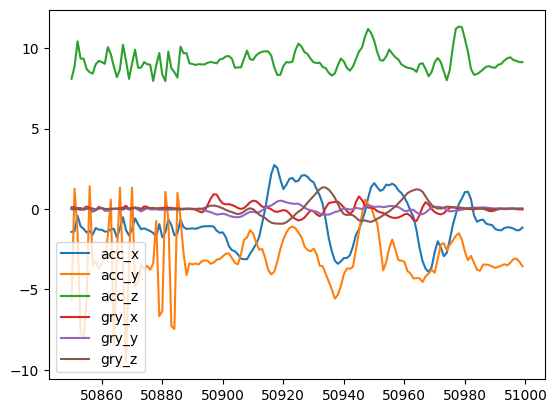

<Figure size 640x480 with 0 Axes>

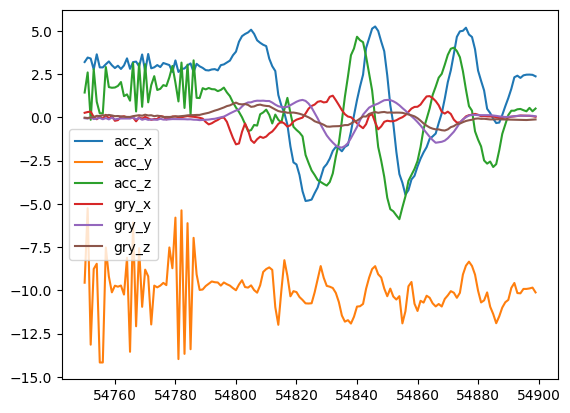

<Figure size 640x480 with 0 Axes>

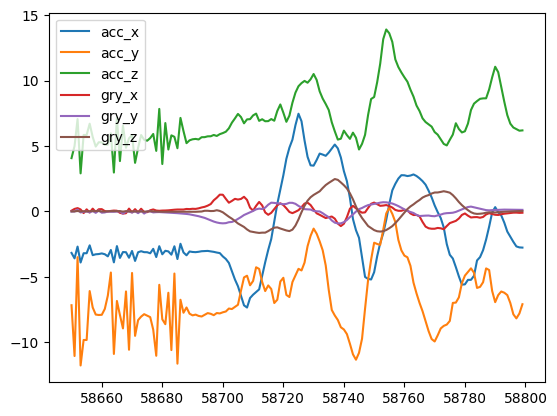

<Figure size 640x480 with 0 Axes>

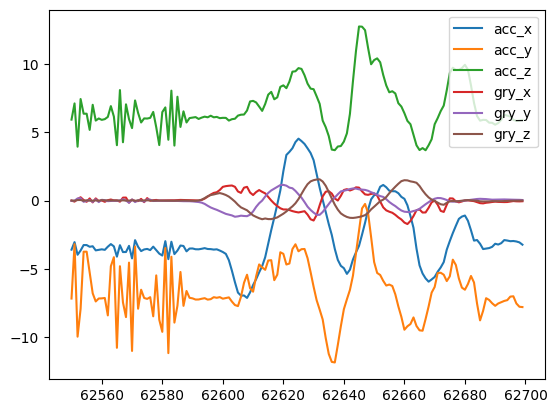

<Figure size 640x480 with 0 Axes>

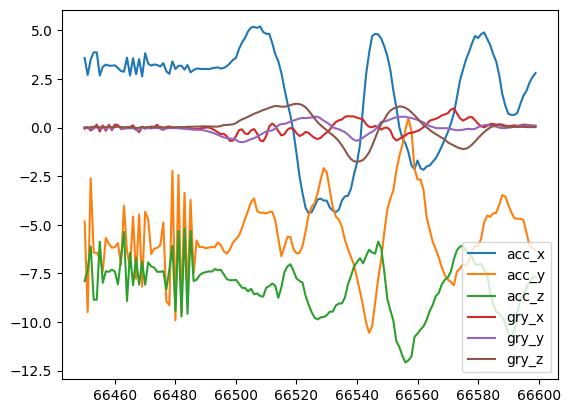

<Figure size 640x480 with 0 Axes>

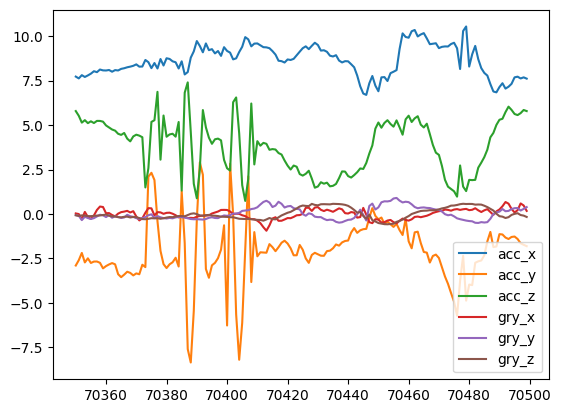

<Figure size 640x480 with 0 Axes>

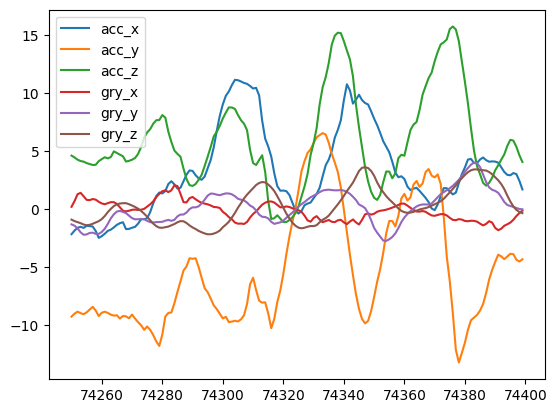

<Figure size 640x480 with 0 Axes>

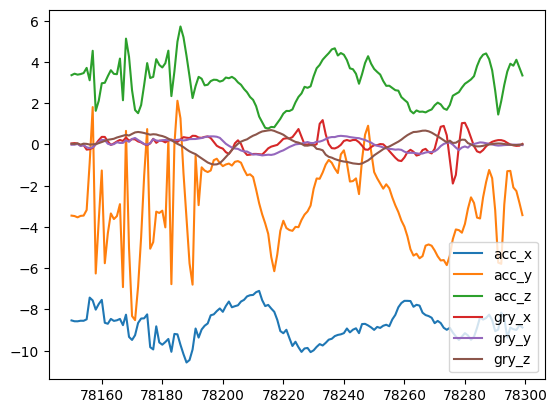

<Figure size 640x480 with 0 Axes>

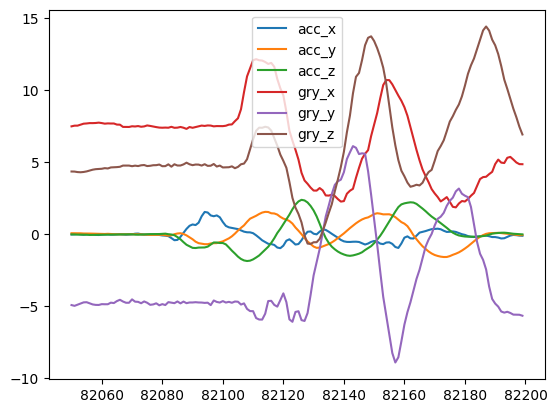

<Figure size 640x480 with 0 Axes>

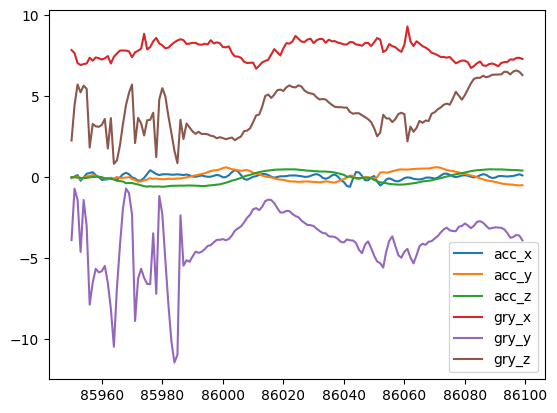

<Figure size 640x480 with 0 Axes>

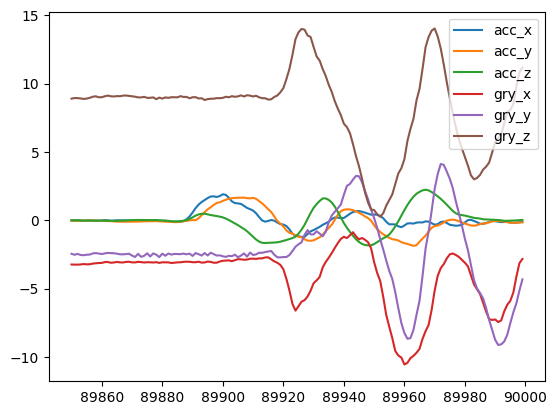

<Figure size 640x480 with 0 Axes>

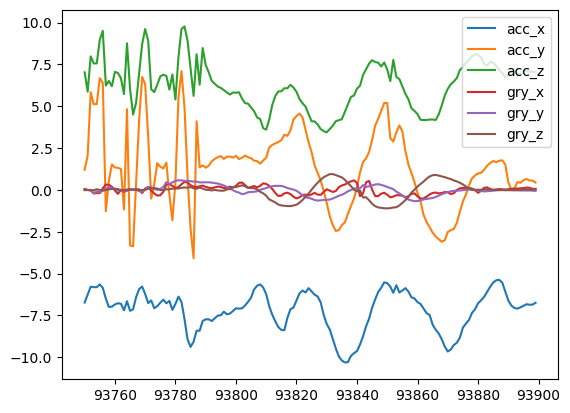

In [13]:
import matplotlib.pyplot as plt
temp = data[data["activity_id"]==1]
for subid in temp["sub_id"].unique():
    temp_df = temp[temp["sub_id"]==subid]
    plt.figure()
    temp_df[["acc_x","acc_y","acc_z","gry_x","gry_y","gry_z"]].plot()
    

In [14]:
520/20

26.0

In [47]:
col_names = [ 
            'acc_x', 'acc_y', 'acc_z', 
            'gry_x', 'gry_y', 'gry_z', 
            'activity_id',
            'sub', 'sub_id']
label_map = [
            (0,"0"), (1,"1"), (2,"2"), (3,"3"), (4,"4"), (5,"5"), 
            (6,"6"), (7,"7"), (8,"8"), (9,"9"), (10,"10"), 
            (11,"11"), (12,"12"), (13,"13"), (14,"14"), (15,"15"), 
            (16,"16"), (17,"17"), (18,"18"), (19,"19"), (20,"20"), 
            (21,"21"), (22,"22"), (23,"23"), (24,"24"), (25,"25")]

labelToId = {int(x[0]): i for i, x in enumerate(label_map)}
df = pd.read_csv("/pfs/data5/home/kit/tm/px6680/datasets/Sensed_Dataset/sensed.csv")
df = df[col_names]


sub_ids_of_each_sub = {}
df["activity_id"] = df["activity_id"].astype(str)
df["sub"] = df["sub"].astype(str)


for sub in df["sub"].unique():
    temp_sub = df[df["sub"]==sub]
    sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())

df = df.set_index('sub_id')
df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

label_mapping = {item[1]:item[0] for item in label_map}

df["activity_id"] = df["activity_id"].map(label_mapping)
df["activity_id"] = df["activity_id"].map(labelToId)
df.dropna(inplace=True)
data_y = df.iloc[:,-1]
data_x = df.iloc[:,:-1]



data_x = data_x.reset_index()
# # sub_id, sensor1, sensor2... sensorn, sub, 

# return data_x, data_y

In [49]:
data_x.shape[0]/650

150.0

In [ ]:
import pandas as pd
import numpy as np
import os

from I2S0W2C2_CFC.dataloaders.dataloader_base import BASE_DATA

# ========================================       SENSED_GESTURE_DATA               =============================

class SENSED_GESTURE_DATA(BASE_DATA):
    
    def __init__(self, args):

        """

        Overal Description
        All the files follow the same structure and contain 9 values in each row. 
        The first field denotes the Epoch time in milliseconds that the data arrived in the application, 
        the second field includes the relative timestamp, as reported by the OS, where the data arrived, 
        the next six fields include the x, y, and z axis values of the accelerometer and the gyroscope sensors respectively, 
        while and the last field contains the label for the executed gesture. 
        The label takes values from 0 to 45, where 0 denotes the character 
        "A", 25 the character "Z", 26 the character "0", 35 the character "9" and 36 to 45 
        the special characters in the order that are described above.
        """
        self.used_cols = None
        
        self.col_names = [ 
            'acc_x', 'acc_y', 'acc_z', 
            'gry_x', 'gry_y', 'gry_z', 
            'activity_id',
            'sub', 'sub_id']
            
        
        self.pos_filter         = None
        self.sensor_filter      = None
        self.selected_cols      = None

        # 'up', 'waveIn', 'relax', 'waveOut', 'fist', 'open', 'pinch', 'down', 'left', 'right', 'forward', 'backward'
        self.label_map = [
            (0,"0"), (1,"1"), (2,"2"), (3,"3"), (4,"4"), (5,"5"), 
            (6,"6"), (7,"7"), (8,"8"), (9,"9"), (10,"10"), 
            (11,"11"), (12,"12"), (13,"13"), (14,"14"), (15,"15"), 
            (16,"16"), (17,"17"), (18,"18"), (19,"19"), (20,"20"), 
            (21,"21"), (22,"22"), (23,"23"), (24,"24"), (25,"25")]
        self.drop_activities = []


        self.train_keys   = []
        self.vali_keys    = []
        self.test_keys    = []
        
        self.LOCV_keys = [
            [1,2,3,4,5],
            [6,7,8,9,10],
            [11,12,13,14,15],
            [16,17,18,19,20],
            [21,22,23,24,25]
        ]
        self.all_keys = [ 1,2,3,4,5,6,
                         7,8,9,10,11,12,
                         13,14,15,16,17,
                         18,19,20,21,
                         22,23,24,25]
        
        self.sub_ids_of_each_sub = {}

        self.exp_mode     = args.exp_mode
        self.split_tag    = "sub"
        
        self.file_encoding = {}  # no use 
        

        self.labelToId = {int(x[0]): i for i, x in enumerate(self.label_map)}
        self.all_labels = list(range(len(self.label_map)))

        self.drop_activities = [self.labelToId[i] for i in self.drop_activities]
        self.no_drop_activites = [item for item in self.all_labels if item not in self.drop_activities]
        super(SENSED_GESTURE_DATA, self).__init__(args)
        
    def load_all_the_data(self, root_path):

        print(" ----------------------- load all the data -------------------")




        df = pd.read_csv(os.path.join(root_path,"sensed.csv"))

        df = df[self.col_names]


        df["activity_id"] = df["activity_id"].astype(str)
        df["sub"] = df["sub"].astype(str)


        for sub in df["sub"].unique():
            temp_sub = df[df["sub"]==sub]
            self.sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())
        
        df = df.set_index('sub_id')
        df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

        label_mapping = {item[1]:item[0] for item in self.label_map}

        df["activity_id"] = df["activity_id"].map(label_mapping)
        df["activity_id"] = df["activity_id"].map(self.labelToId)
        
        df.dropna(inplace=True)
        data_y = df.iloc[:,-1]
        data_x = df.iloc[:,:-1]


        data_x = data_x.reset_index()
        # sub_id, sensor1, sensor2... sensorn, sub, 

        return data_x, data_y

# Gesture dataset

In [79]:
import pandas as pd
import numpy as np
import os

path = "/pfs/data5/home/kit/tm/px6680/datasets/Gesture_Dataset/all.csv"

data = pd.read_csv(path)

In [20]:
data

,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8,q1,q2,...,q4,g1,g2,g3,a1,a2,a3,sub,activity_id,sub_id
0,-0.007812,-0.023226,-0.039907,-0.000211,0.018792,0.000000,-0.007601,-0.007601,-0.838971,0.509483,...,-0.173799,-0.029178,-0.811801,0.414670,-0.281532,1.169482,3.201014,training001,up,1
1,-0.002792,-0.036552,-0.021748,-0.004458,-0.038499,-0.012552,-0.020927,-0.020927,-0.839075,0.509313,...,-0.173829,-0.030278,-0.809235,0.413570,1.939439,0.950513,2.497185,training001,up,1
2,0.005326,-0.008868,-0.067450,-0.039414,-0.065339,-0.034089,-0.013138,-0.013138,-0.839179,0.509143,...,-0.173859,-0.031378,-0.806668,0.412470,4.160410,0.731544,1.793356,training001,up,1
3,-0.007390,0.014428,0.058770,0.023367,0.016751,-0.003730,-0.005349,-0.005349,-0.839338,0.508884,...,-0.173879,-0.032059,-0.804771,0.411538,6.477665,0.512575,1.075263,training001,up,1
4,-0.013678,-0.031743,0.035684,0.056682,0.093797,0.009783,0.004880,0.000000,-0.839683,0.508324,...,-0.173865,-0.031326,-0.805138,0.411171,9.120933,0.293606,0.308871,training001,up,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7708795,0.022241,0.007812,-0.001197,0.037866,0.111346,0.171312,0.067919,0.052294,0.312128,-0.615872,...,0.490393,-0.263813,-0.989121,-0.347973,0.802928,-2.924550,0.509009,test001,down,25696
7708796,0.000000,0.003324,-0.018949,0.006647,0.009885,0.017869,0.021193,0.005568,0.312140,-0.615781,...,0.490432,-0.263585,-0.989901,-0.348178,0.741366,-2.808183,0.466592,test001,down,25696
7708797,-0.002237,-0.005576,-0.003339,-0.006679,-0.055790,0.005545,0.013388,-0.004473,0.312151,-0.615696,...,0.490456,-0.263463,-0.991489,-0.348911,0.553679,-2.714339,0.419670,test001,down,25696
7708798,-0.010041,-0.002229,-0.001103,-0.004434,-0.050206,-0.054664,-0.014475,-0.024540,0.312162,-0.615612,...,0.490480,-0.263340,-0.993078,-0.349645,0.365991,-2.620495,0.372748,test001,down,25696


In [13]:
subs_list = list(data["sub"].unique())
train_list = [sub for sub in subs_list if "training" in sub]
test_list = [sub for sub in subs_list if "test" in sub]

In [21]:
sub_ids_of_each_sub = {}
label_map = [(0, 'up'),
                          (1, "waveIn"), 
                          (2, "relax"), 
                          (3, "waveOut"),
                          (4, "fist"),
                          (5, 'open'),
                          (6, 'pinch'),
                          (7, 'down'),
                          (8, 'left'),
                          (9, 'right'),
                          (10,'forward'),
                          (11,'backward')
                         ]

root_path = "/pfs/data5/home/kit/tm/px6680/datasets/Gesture_Dataset"
df = pd.read_csv(os.path.join(root_path,"all.csv"))
df["activity_id"] = df["activity_id"].astype(str)
df["sub"] = df["sub"].astype(str)


for sub in df["sub"].unique():
    temp_sub = df[df["sub"]==sub]
    sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())
    
df = df.set_index('sub_id')
df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

label_mapping = {item[1]:item[0] for item in label_map}
labelToId = {int(x[0]): i for i, x in enumerate(label_map)}
df["activity_id"] = df["activity_id"].map(label_mapping)
df["activity_id"] = df["activity_id"].map(labelToId)
df.dropna(inplace=True)
data_y = df.iloc[:,-1]
data_x = df.iloc[:,:-1]



In [ ]:
import pandas as pd
import numpy as np
import os

from I2S0W2C2_CFC.dataloaders.dataloader_base import BASE_DATA

# ========================================       GESTURE_HAR_DATA               =============================

class GESTURE_HAR_DATA(BASE_DATA):
    
    def __init__(self, args):
        self.used_cols = None
        
        self.col_names = ['emg1', 'emg2', 'emg3', 'emg4', 'emg5', 'emg6', 'emg7', 'emg8', 
                          'q1', 'q2', 'q3', 'q4', 
                          'g1', 'g2', 'g3', 
                          'a1', 'a2', 'a3', 
                          'sub',
                          'activity_id', 
                          'sub_id']
        
        
        self.pos_filter         = None
        self.sensor_filter      = None
        self.selected_cols      = None

        # 'up', 'waveIn', 'relax', 'waveOut', 'fist', 'open', 'pinch', 'down', 'left', 'right', 'forward', 'backward'
        self.label_map = [(0, 'up'),
                          (1, "waveIn"), 
                          (2, "relax"), 
                          (3, "waveOut"),
                          (4, "fist"),
                          (5, 'open'),
                          (6, 'pinch'),
                          (7, 'down'),
                          (8, 'left'),
                          (9, 'right'),
                          (10,'forward'),
                          (11,'backward')
                         ]
        self.drop_activities = []


        self.train_keys   = ['training001', 'training025', 'training026', 'training027',
                             'training032', 'training033', 'training035', 'training036',
                             'training037', 'training038', 'training024', 'training039',
                             'training040', 'training041', 'training042', 'training043']
        self.vali_keys    = []
        self.test_keys    = ['test001', 'test024', 'test025', 'test026',
                             'test027', 'test028', 'test029', 'test002',
                             'test038', 'test039', 'test040', 'test041',
                             'test042', 'test003', 'test004', 'test023']
        
        self.LOCV_keys = [
            ['training001', 'training025', 'training026', 'training027'],
            ['training032', 'training033', 'training035', 'training036'],
            ['training037', 'training038', 'training024', 'training039'],
            ['training040', 'training041', 'training042', 'training043'],
            ['test001', 'test024', 'test025', 'test026'],
            ['test027', 'test028', 'test029', 'test002'],
            ['test038', 'test039', 'test040', 'test041'],
            ['test042', 'test003', 'test004', 'test023']]
        self.all_keys = ['training001', 'training025', 'training026', 'training027',
                         'training032', 'training033', 'training035', 'training036',
                         'training037', 'training038', 'training024', 'training039',
                         'training040', 'training041', 'training042', 'training043',
                         'test001', 'test024', 'test025', 'test026',
                         'test027', 'test028', 'test029', 'test002',
                         'test038', 'test039', 'test040', 'test041',
                         'test042', 'test003', 'test004', 'test023']
        self.sub_ids_of_each_sub = {}

        self.exp_mode     = args.exp_mode
        self.split_tag = "sub"
        
        self.file_encoding = {}  # no use 
        

        self.labelToId = {int(x[0]): i for i, x in enumerate(self.label_map)}
        self.all_labels = list(range(len(self.label_map)))

        self.drop_activities = [self.labelToId[i] for i in self.drop_activities]
        self.no_drop_activites = [item for item in self.all_labels if item not in self.drop_activities]
        super(GESTURE_HAR_DATA, self).__init__(args)
        
    def load_all_the_data(self, root_path):

        print(" ----------------------- load all the data -------------------")
        df = pd.read_csv(os.path.join(root_path,"all.csv"))

        df["activity_id"] = df["activity_id"].astype(str)
        df["sub"] = df["sub"].astype(str)


        for sub in df["sub"].unique():
            temp_sub = df[df["sub"]==sub]
            self.sub_ids_of_each_sub[sub] = list(temp_sub["sub_id"].unique())
    
        df = df.set_index('sub_id')
        df = df[list(df.columns)[:-2]+["sub"]+["activity_id"]]

        label_mapping = {item[1]:item[0] for item in self.label_map}

        df["activity_id"] = df["activity_id"].map(label_mapping)
        df["activity_id"] = df["activity_id"].map(self.labelToId)
        df.dropna(inplace=True)
        data_y = df.iloc[:,-1]
        data_x = df.iloc[:,:-1]


        data_x = data_x.reset_index()
        # sub_id, sensor1, sensor2... sensorn, sub, 

        return data_x, data_y